# The problem:

### What is the input?:
- #### We will be working with a tabular dataset. The dataset is the wish.com product dataset.

### What is the output?:
- #### The output is the prediction of the product rating given the other features known for a product on Wish.com. Ratings are in categories from 1 to 5.

### What data mining function is required?:
- #### The problem will be solved by classification algorithms.

### What could be the challenges?:
- #### The data is noisy and biased, where classes(1, 2) have very small numbers of samples, and class(4) has the biggest majority. Some features have a lot of missing values and incorrectly written data.

### What is the impact?:
- #### It can assist companies in determining the products that matter most to customers, which can guide product development and marketing plans.

### What is the ideal solution?:
- #### The best solution we got is "Decision Tree V2(trial 4)", where its score on testing is (0.76).

# Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting data
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/cisc-873-dm-w23-a1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cisc-873-dm-w23-a1/test_new.csv
/kaggle/input/cisc-873-dm-w23-a1/train_new.csv


In [2]:
# read training and testing data
df_train = pd.read_csv("/kaggle/input/cisc-873-dm-w23-a1/train_new.csv", index_col="id")
df_test = pd.read_csv("/kaggle/input/cisc-873-dm-w23-a1/test_new.csv", index_col="id")
# show first five rows
df_train.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month
id,,,,,,,,,,,,,,,,,,,,,
272,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08
1515,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08
940,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08
309,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08
226,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08


In [3]:
# show columns details 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 272 to 1536
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  p

In [4]:
# show unique values in some categorical features
cat_col = ["currency_buyer", "theme", "crawl_month", "shipping_option_name", "origin_country", "badges_count", "rating"]
for col in cat_col:
    print(f"Unique values in {col} is :\n", df_train[col].value_counts())
    print("####################################################################################")
    

Unique values in currency_buyer is :
 EUR    1094
Name: currency_buyer, dtype: int64
####################################################################################
Unique values in theme is :
 summer    1094
Name: theme, dtype: int64
####################################################################################
Unique values in crawl_month is :
 2020-08    1094
Name: crawl_month, dtype: int64
####################################################################################
Unique values in shipping_option_name is :
 Livraison standard         1047
Standard Shipping            16
Envio Padrão                  6
الشحن القياسي                 4
Expediere Standard            4
Envío normal                  3
Standardversand               3
Livraison Express             3
Standardowa wysyłka           2
Standart Gönderi              2
Стандартная доставка          2
Spedizione standard           1
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: shipping_option_name, dtype: int64
######

## We will remove the features that are not useful for the prediction.

In [5]:
# this fun is used to replace sizes that are typos  with suitable names
def prod_size_cleaner(df, col):
    df[col].replace(['S', 'S.', 's', 'Size S', 'Size-S', 'Size S.', 'Suit-S', 'size S','S Pink', 'pants-S', 'US-S', 'SIZE S', 'S (waist58-62cm)', 'Size--S', '25-S', 'Size/S', 'S Diameter 30cm', 'S..', 'S(Pink & Black)'], 'S', inplace=True)
    df[col].replace(['XS', 'XS.', 'SIZE XS', 'Size-XS'], 'XS', inplace=True)
    df[col].replace(['XXS', 'XXXS', 'SIZE-XXS', 'Size -XXS', 'Size XXS', 'Size-XXS', 'SIZE XXS'], 'XXS+', inplace=True)
    df[col].replace(['M', 'M.', 'Size M'], 'M', inplace=True)
    df[col].replace(['L', 'SizeL', '32/L', 'L.', 'Size-L'], 'L', inplace=True)
    df[col].replace(['XL', '2XL', '1 PC - XL', 'X   L'], 'XL', inplace=True)
    df[col].replace(['XXL', '4XL', '2XL', 'Size4XL', '3XL', 'XXXXXL', '1 PC - XL', 'SIZE-4XL', '04-3XL', 'Size-5XL', 'XXXXL', '5XL', 'XXXL'], 'XXL+', inplace=True)
    size_val_counts = df[col].value_counts()
    # Select the values where the count is less than 5 
    to_change = size_val_counts[size_val_counts <= 5].index
    df.loc[df[col].isin(to_change), col] = "Other"
    
#------------------------------------------------------------------------------------------------
#  this fun is used to replace colors that are typos with suitable names
def color_cleaner(df, col):
    color_dict = {
        'Black' : 'black',
        'coolblack': 'black',
        'White': 'white',
        'offwhite': 'white', 
        'bluue': 'blue',
        'prussianblue': 'blue',
        'navyblue': 'blue', 
        'navy blue': 'blue',
        'lightblue': 'blue',
        'skyblue': 'blue',
        'darkblue': 'blue',
        'navy' : 'blue',
        'bluee': 'blue',
        'bluue': 'blue',
        'denimblue': 'blue', 
        'lakeblue': 'blue', 
        'Blue': 'blue',
        'gold': 'yellow',
        'lightyellow': 'yellow',
        'winered': 'red',
        'rosered': 'red',
        'watermelonred': 'red',
        'RED': 'red',
        'winered': 'red',
        'wine red': 'red',
        'rose': 'red',
        'orange-red': 'red',
        'Rose red': 'red',
        'wine': 'red',
        'coralred': 'red',
        'burgundy': 'red', 
        'lightred': 'red', 
        'lightpink': 'pink',
        'Pink': 'pink',
        'dustypink': 'pink',
        'armygreen':'green',
        'khaki': 'green',
        'lightgreen': 'green',
        'fluorescentgreen': 'green',
        'army green': 'green',
        'applegreen': 'green',
        'Army green': 'green',
        'mintgreen': 'green',
        'army': 'green', 
        'lightkhaki': 'green', 
        'darkgreen': 'green', 
        'light green': 'green', 
        'lightkhaki': 'green', 
        'lightgray': 'grey', 
        'apricot': 'orange',
        'violet': 'purple',
        'lightpurple': 'purple', 
        'gray': 'grey',
        'silver': 'grey',
        'coffee': 'brown', 
        'blackwhite': 'dual'
         }

    for key, value in color_dict.items():
         df[col].replace(key, value, inplace=True)

    colors_count = df[col].value_counts()
    # Select the values where the count is less than 5 
    to_change = colors_count[colors_count <= 8].index
    df.loc[df[col].isin(to_change), col] = "Other"    

In [6]:
def wrange(df):
    
    # drop features that are dependent on target column
    df.drop(["rating_count", "badge_product_quality"], axis=1, inplace=True)
    
    # drop features that have high or low cardinality
    df.drop(["currency_buyer","theme", "tags", "crawl_month", "shipping_option_name"], axis=1, inplace=True)
    
    # drop url features
    df.drop(["merchant_profile_picture"], axis=1, inplace=True)
    
    # drop features that are >50% null values
    df.drop(["has_urgency_banner", "urgency_text"], axis=1, inplace=True)
    
    # drop features that have high relationship together and use one of them ("merchant_title", "merchant_name", "merchant_id")
    df.drop(["merchant_title", "merchant_name"], axis=1, inplace=True)
    
    # drop "merchant_info_subtitle" feature because there is a feature ("merchant_rating_count") extrated from it 
    df.drop(["merchant_info_subtitle"], axis=1, inplace=True)
    
    
    # clean "product_variation_size_id" and "product_color", because they have typos
    prod_size_cleaner(df, "product_variation_size_id")
    color_cleaner(df, "product_color")
    
    # fill null values in categorical features
    df["product_color"].fillna(df["product_color"].mode()[0], inplace=True)
    df["product_variation_size_id"].fillna(df["product_variation_size_id"].mode()[0], inplace=True)
    df["origin_country"].fillna(df["origin_country"].mode()[0], inplace=True)               
    return df

In [7]:
df_train = wrange(df_train)
# set any rate over 5 to 5
df_train["rating"] = df_train["rating"].apply(lambda i: 5 if (i > 5) else i)
# in testing
df_test = wrange(df_test)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 272 to 1536
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   units_sold                    1094 non-null   int64  
 3   uses_ad_boosts                1094 non-null   int64  
 4   rating                        1094 non-null   float64
 5   badges_count                  1094 non-null   int64  
 6   badge_local_product           1094 non-null   int64  
 7   badge_fast_shipping           1094 non-null   int64  
 8   product_color                 1094 non-null   object 
 9   product_variation_size_id     1094 non-null   object 
 10  product_variation_inventory   1094 non-null   int64  
 11  shipping_option_price         1094 non-null   int64  
 12  shipping_is_express           1094 non-null   int64  
 13  c

In [9]:
df_train.isnull().any()

price                           False
retail_price                    False
units_sold                      False
uses_ad_boosts                  False
rating                          False
badges_count                    False
badge_local_product             False
badge_fast_shipping             False
product_color                   False
product_variation_size_id       False
product_variation_inventory     False
shipping_option_price           False
shipping_is_express             False
countries_shipped_to            False
inventory_total                 False
origin_country                  False
merchant_rating_count           False
merchant_rating                 False
merchant_id                     False
merchant_has_profile_picture    False
dtype: bool

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 937 to 196
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         479 non-null    float64
 1   retail_price                  479 non-null    int64  
 2   units_sold                    479 non-null    int64  
 3   uses_ad_boosts                479 non-null    int64  
 4   badges_count                  479 non-null    int64  
 5   badge_local_product           479 non-null    int64  
 6   badge_fast_shipping           479 non-null    int64  
 7   product_color                 479 non-null    object 
 8   product_variation_size_id     479 non-null    object 
 9   product_variation_inventory   479 non-null    int64  
 10  shipping_option_price         479 non-null    int64  
 11  shipping_is_express           479 non-null    int64  
 12  countries_shipped_to          479 non-null    int64  
 13  inv

In [11]:
df_test.isnull().any()

price                           False
retail_price                    False
units_sold                      False
uses_ad_boosts                  False
badges_count                    False
badge_local_product             False
badge_fast_shipping             False
product_color                   False
product_variation_size_id       False
product_variation_inventory     False
shipping_option_price           False
shipping_is_express             False
countries_shipped_to            False
inventory_total                 False
origin_country                  False
merchant_rating_count           False
merchant_rating                 False
merchant_id                     False
merchant_has_profile_picture    False
dtype: bool

In [12]:
df_test.isnull().any()

price                           False
retail_price                    False
units_sold                      False
uses_ad_boosts                  False
badges_count                    False
badge_local_product             False
badge_fast_shipping             False
product_color                   False
product_variation_size_id       False
product_variation_inventory     False
shipping_option_price           False
shipping_is_express             False
countries_shipped_to            False
inventory_total                 False
origin_country                  False
merchant_rating_count           False
merchant_rating                 False
merchant_id                     False
merchant_has_profile_picture    False
dtype: bool

# Exploratory Data Analysis

In [13]:
# plot Frequencies of data for each feature
def plot_ranges(x):
    plt.boxplot(x,vert=False)
    plt.title(f"{x.name} Spredding")
    plt.xlabel(x.name)

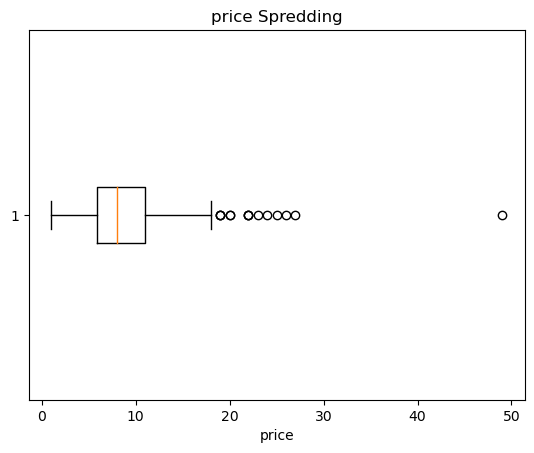

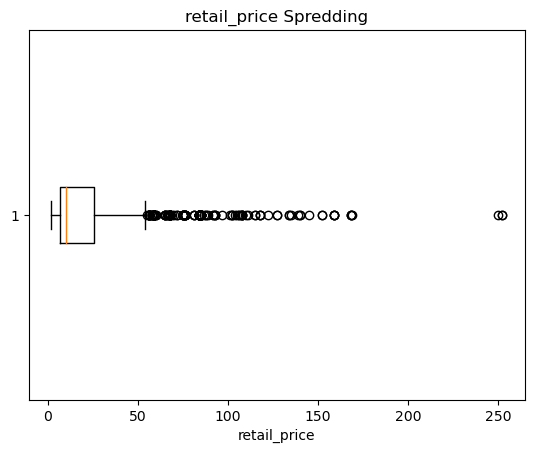

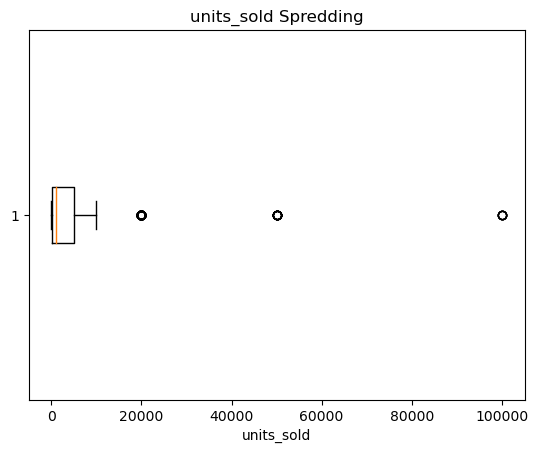

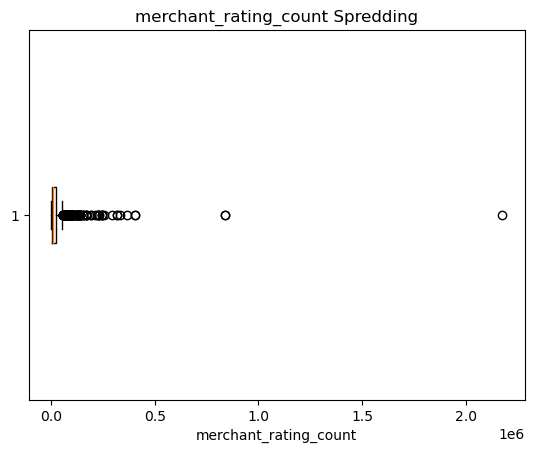

In [14]:
# plot some numeric features to show thier ranges  
plot_ranges(df_train["price"])
plt.show();
plot_ranges(df_train["retail_price"])
plt.show();
plot_ranges(df_train["units_sold"])
plt.show();
plot_ranges(df_train["merchant_rating_count"])
plt.show();

- As we can see "merchant_rating_count" has some outliers, that we should remove.

- ### Explore Categorical Data

In [15]:
# show unique values for each categorical feature for training data
for col in df_train.select_dtypes("object").columns:
    print(f"- Unique values of '{col}':\n\n", df_train[col].value_counts())
    print("---------------------------------------------------------------------\n")

- Unique values of 'product_color':

 black         253
white         177
blue          122
green         106
red           100
pink           75
yellow         71
grey           56
Other          54
purple         38
orange         17
multicolor     14
brown          11
Name: product_color, dtype: int64
---------------------------------------------------------------------

- Unique values of 'product_variation_size_id':

 S        491
XS       258
M        141
XXS+      87
Other     46
L         31
XXL+      23
XL        17
Name: product_variation_size_id, dtype: int64
---------------------------------------------------------------------

- Unique values of 'origin_country':

 CN    1066
US      22
VE       3
SG       2
GB       1
Name: origin_country, dtype: int64
---------------------------------------------------------------------

- Unique values of 'merchant_id':

 5acaf29d5ebcfd72403106a8    8
558c2cdc89d53c4005ea2920    7
5533c83986ff95173dc017d0    6
583138b06339b410ab9663ec  

In [16]:
# show unique values for each categorical feature for testing data
for col in df_test.select_dtypes("object").columns:
    print(f"- Unique values of '{col}':\n\n", df_test[col].value_counts())
    print("---------------------------------------------------------------------\n")

- Unique values of 'product_color':

 black     95
white     81
red       50
green     45
blue      42
yellow    37
pink      32
Other     30
grey      29
purple    17
orange    12
beige      9
Name: product_color, dtype: int64
---------------------------------------------------------------------

- Unique values of 'product_variation_size_id':

 S        213
XS       111
M         65
XXS+      26
L         24
Other     23
XXL+      11
XL         6
Name: product_variation_size_id, dtype: int64
---------------------------------------------------------------------

- Unique values of 'origin_country':

 CN    467
US      9
VE      2
AT      1
Name: origin_country, dtype: int64
---------------------------------------------------------------------

- Unique values of 'merchant_id':

 558c2cdc89d53c4005ea2920    8
593fcbd5ff3e807d6a8485ff    4
53aa664438d3046ee44a5024    4
5ba2251b4315d12ebce873fa    4
5acaf29d5ebcfd72403106a8    4
                           ..
556fc80f95528719e004fe8b    1

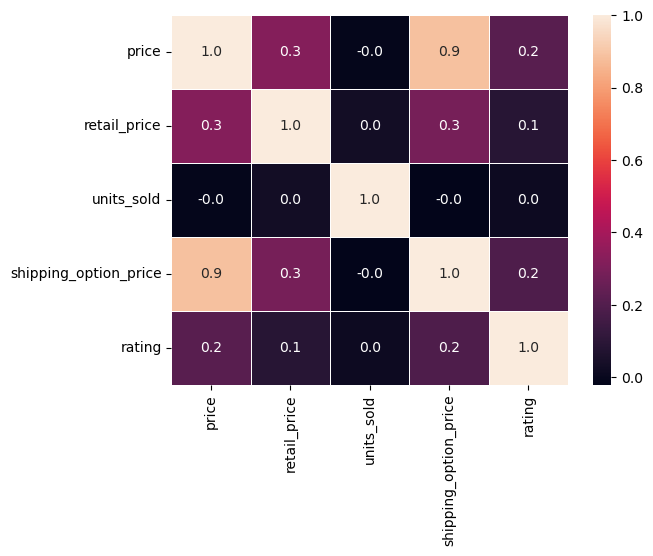

In [17]:
corr = df_train[["price", "retail_price", "units_sold", "shipping_option_price", "rating"]].corr()
sns.heatmap(corr, annot=True, fmt=".1f", linewidth=.5);

- As we can see "price" feature has the greatest correlation with the target, while "units_sold" has the smallest.
- The correlation between "price" and "shipping_option_price" is very high.

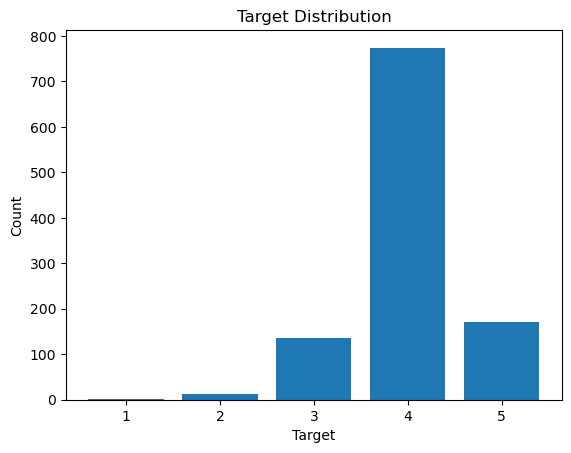

In [18]:
# plot target data distribution
plt.bar(df_train["rating"].value_counts().index, df_train["rating"].value_counts());
plt.title("Target Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show();

- As we can see the data are biased where 4 rate has the majority of data, while 1, and 2 rates have very small numbers of data.

# Split the data into X features and y target

In [19]:
# split training data into training and validation
X = df_train.drop(["rating"], axis=1)
y = df_train["rating"]
X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)
# test data
X_test = df_test

In [20]:
X_train.head()

,price,retail_price,units_sold,uses_ad_boosts,badges_count,badge_local_product,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture
id,,,,,,,,,,,,,,,,,,,
38,3.67,9,5000,0,0,0,0,white,XL,15,1,0,111,50,CN,253249,4.070618,53e4bb20ff4d6d1b68bdb6d1,1
456,2.72,17,1000,1,0,0,0,blue,XS,3,1,0,43,50,CN,37375,4.179425,576b9101ac55bd7f2108992b,0
1337,9.00,50,5000,0,0,0,0,black,S,50,3,0,43,50,CN,7889,3.995056,56d6cf588bd26e03ee663123,0
1488,5.75,25,1000,0,0,0,0,yellow,S,50,2,0,25,50,CN,706,4.209632,5d4cf83dc8bc520142c8534f,0
1398,16.00,33,100,1,0,0,0,black,M,50,5,0,33,50,CN,2435,3.996715,59e071d99fbc517c29711220,0


In [21]:
y_train

id
38      3.0
456     4.0
1337    4.0
1488    4.0
1398    5.0
       ... 
993     5.0
926     4.0
781     4.0
1165    4.0
121     5.0
Name: rating, Length: 875, dtype: float64

In [22]:
# save the outputs of each model
def save_output(pred):
    # create a dataframe using id in the index of X_train and rating using passed prediction
    df = pd.DataFrame({"id": X_test.index, "rating": pred})
    # the df as a csv file in the local
    df.to_csv("pred_walkthrough.csv", index=False)

# Baseline Model(trail 0):

In [23]:
df_train["rating"].value_counts()

4.0    774
5.0    171
3.0    135
2.0     12
1.0      2
Name: rating, dtype: int64

- ## As we can notice the data is biased, where class(4) have the biggest majority, it's about 774 samples.<br>
- ## So the base line model will be biased to class(4)

In [24]:
base_model = [df_train["rating"].mode()[0]] * len(df_train["rating"])
base_model[:10]

[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]

# Note:
- ### Some models we will use GridSearch technique with, so we will use all data with these models.
- ### Some models we will use the splitted data(train and test"validation") that do not use GridSearch.

# SVM model

- ## SVM model V1(trial 1):

- We will use OneHotEncoder to encode the categorical data, so No. features will be big, to solve this issue we will decrease the regularization "C=1.0", and "gamma=0.01".
- We will use MinMaxScaler to normalize the data within range of (0 to 1)
- We will use all features.

In [25]:
# make a pipeline to make life easy
svc_v1 = make_pipeline(
    OneHotEncoder(use_cat_names=True), # encode model feature with one hot technique
    MinMaxScaler(),
    SVC(C=1., gamma=0.01) # train the model with "C=1.0", and "gamma=0.01" 
) 
# Train the model on training data
svc_v1.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['product_color',
                                     'product_variation_size_id',
                                     'origin_country', 'merchant_id'],
                               use_cat_names=True)),
                ('minmaxscaler', MinMaxScaler()), ('svc', SVC(gamma=0.01))])

In [26]:
# show the f1_score on Training data
print("Scoring on Training data:\n")
svc_v1_pred = svc_v1.predict(X_train)
print("F1_weithted is: ",metrics.f1_score(y_train, svc_v1_pred, average="weighted"))
metrics.f1_score(y_train, svc_v1_pred, average=None)

Scoring on Training data:

F1_weithted is:  0.5907189617329898


array([0.        , 0.        , 0.        , 0.83099532, 0.        ])

In [27]:
# show the f1_score on Testing data
svc_v1_pred = svc_v1.predict(X_valid)
print("F1_weithted is: ",metrics.f1_score(y_valid, svc_v1_pred, average="weighted"))
metrics.f1_score(y_valid, svc_v1_pred, average=None)

F1_weithted is:  0.5687208457950251


array([0.        , 0.        , 0.        , 0.81940701, 0.        ])

In [28]:
# get the prediction on testing data and save it
svc_v1_pred = svc_v1.predict(X_test)
save_output(svc_v1_pred)
svc_v1_pred

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

- ## As we can notice SVM is biased to class(4) as base_model does. It has a good score on class(4), but zero in others classes.
- ## We will try to solve biased problem in next trials.

- ## SVM Model V2(trial 2):

- We will use OneHotEncoder to encode the categorical data, this will increase No. features.
- As the No.features is big, we should use a bit small regularizations "C=5" to decrease Overfitting and "gamma=1".
- We will use StandardScaler to make the distribution of data standarized "mean=0 and std=1".
- We will use all features except "merchant_has_profile_picture", "uses_ad_boosts"

In [29]:
# make a pipeline to make life easy
svc_v2 = make_pipeline(
    OneHotEncoder(use_cat_names=True),# encode model feature with One Hot technique
    StandardScaler(),# change the distribution to standard normal distribution "mean=0, std=1"
    SVC(C=5, gamma=.1, class_weight="balanced")# train the model with "C=5", "gamma=1.0" and "class_weight= balanced" to balance the the biased data
) 
# Train the model on training data except "merchant_has_profile_picture", "uses_ad_boosts"
X_train_svc2 = X_train.drop(["merchant_has_profile_picture", "uses_ad_boosts"], axis=1)
svc_v2.fit(X_train_svc2, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['product_color',
                                     'product_variation_size_id',
                                     'origin_country', 'merchant_id'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, class_weight='balanced', gamma=0.1))])

In [30]:
# show the f1_score on Training data except "merchant_has_profile_picture", "uses_ad_boosts"
svc_v2_pred = svc_v2.predict(X_train_svc2)
print("Training Scores:\n")
print("F1_weithted is: ",metrics.f1_score(y_train, svc_v2_pred, average="weighted"))
metrics.f1_score(y_train, svc_v2_pred, average=None)

Training Scores:

F1_weithted is:  0.9921158053154727


array([1.        , 0.90909091, 0.98507463, 0.99596449, 0.98601399])

In [31]:
# show the f1_score on Testing data except "merchant_has_profile_picture", "uses_ad_boosts"
X_valid_svc2 = X_valid.drop(["merchant_has_profile_picture", "uses_ad_boosts"], axis=1)
svc_v2_pred = svc_v2.predict(X_valid_svc2)
print("Testing Scores:\n")
print("F1_weithted is: ",metrics.f1_score(y_valid, svc_v2_pred, average="weighted"))
metrics.f1_score(y_valid, svc_v2_pred, average=None)

Testing Scores:

F1_weithted is:  0.7020129782643062


array([1.        , 0.66666667, 0.34146341, 0.85393258, 0.33333333])

In [32]:
# get the prediction on testing data and save it
X_test_svc2 = X_test.drop(["merchant_has_profile_picture", "uses_ad_boosts"], axis=1)
svc_v2_pred = svc_v2.predict(X_test_svc2)
save_output(svc_v2_pred)
svc_v2_pred

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 3., 4., 4., 3., 4., 5., 4., 4., 4.,
       5., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 3., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 3., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

- ## We used class_weight parameter to make the model sort of balanced, and removed these features "merchant_has_profile_picture", and "uses_ad_boosts", this help us to get good scores on each class except class 3 and 5 where classes f1_score are [1.        , 0.66666667, 0.34146341, 0.85393258, 0.33333333]
- ## But unfortunately this model overfits as we can see the scores on training and testing.
- ## I think it overfits because class_weight="balanced".

# Decision Tree

- ## Decision Tree V1(trial 3)

- We will use grid search to train the model and tune it by different parameters like "entropy" or "gini" and max_depth in range from (2 to 100 with 3 steps each time).
- We used OneHotEncoder that will encode categorical data.
- We used Kfold=5 to train the model and evaluate it on different fold each time.

In [33]:
decT_params = {
               "criterion": ["entropy", "gini"],
               "max_depth": range(2, 100, 3)
              }
dt_v1 = make_pipeline(
                 OneHotEncoder(use_cat_names=True),# use onehot technique to encode 
                 GridSearchCV(DecisionTreeClassifier(random_state=2),
                 param_grid=decT_params, 
                 cv=5, # number of folds
                 scoring='f1_weighted', # evaluation metric 
                 verbose=100,
                 return_train_score=True)
)

# train the decision tree model on training data and all features except "merchant_has_profile_picture"
dt_v1.fit(X.drop(["merchant_has_profile_picture"], axis=1), y)

Fitting 5 folds for each of 66 candidates, totalling 330 fits
[CV 1/5; 1/66] START criterion=entropy, max_depth=2.............................
[CV 1/5; 1/66] END criterion=entropy, max_depth=2;, score=(train=0.648, test=0.615) total time=   0.0s
[CV 2/5; 1/66] START criterion=entropy, max_depth=2.............................
[CV 2/5; 1/66] END criterion=entropy, max_depth=2;, score=(train=0.655, test=0.662) total time=   0.0s
[CV 3/5; 1/66] START criterion=entropy, max_depth=2.............................
[CV 3/5; 1/66] END criterion=entropy, max_depth=2;, score=(train=0.655, test=0.664) total time=   0.0s
[CV 4/5; 1/66] START criterion=entropy, max_depth=2.............................
[CV 4/5; 1/66] END criterion=entropy, max_depth=2;, score=(train=0.660, test=0.614) total time=   0.0s
[CV 5/5; 1/66] START criterion=entropy, max_depth=2.............................
[CV 5/5; 1/66] END criterion=entropy, max_depth=2;, score=(train=0.651, test=0.648) total time=   0.0s
[CV 1/5; 2/66] STA

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['product_color',
                                     'product_variation_size_id',
                                     'origin_country', 'merchant_id'],
                               use_cat_names=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeClassifier(random_state=2),
                              param_grid={'criterion': ['entropy', 'gini'],
                                          'max_depth': range(2, 100, 3)},
                              return_train_score=True, scoring='f1_weighted',
                              verbose=100))])

In [34]:
print("Best Parameters: ", dt_v1.named_steps["gridsearchcv"].best_params_)
print("Best score: ", dt_v1.named_steps["gridsearchcv"].best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 65}
Best score:  0.7403644660945348


In [35]:
# get the prediction on testing data and save it
dt_v1_pred = dt_v1.predict(X_test.drop(["merchant_has_profile_picture"], axis=1))
save_output(dt_v1_pred)
dt_v1_pred

array([5., 4., 3., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 5., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 3., 4., 3., 3., 3., 5., 3., 4., 4.,
       5., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3.,
       4., 4., 5., 4., 5., 5., 4., 3., 5., 4., 4., 4., 4., 4., 5., 4., 4.,
       4., 4., 5., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 5., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 1., 4., 4., 4., 3., 4., 4., 2., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       3., 4., 5., 4., 3., 4., 4., 4., 4., 4., 3., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 3., 4., 4.

- ## Decision Trees usually overfit as we can see in scoring on training and validation, but it gives us a good score on validation (0.74).
- ## We used "gini" to measure the impurity and split the tree.
- ## When we removed "merchant_has_profile_picture" we get this score "0.74", so I think it is not important with this model.

- ## Decision Tree V2(trial 4):

- We will use "gini" as a criterion to measure the impurity and split the tree and max_depth = 15 as a regulizer.
- We used OneHotEncoder that will encode categorical data.
- We will use all features except feature of "retail_price".

In [36]:
dt_v2 = make_pipeline(
    OneHotEncoder(use_cat_names=True),# encode model feature with One Hot technique
    DecisionTreeClassifier(random_state=2, # fix the random state to do not change every time we run the model
                           criterion="gini", # use "gini" as a impurity measure
                           max_depth=15) # "max_depth=15" as a regularization
)

# train the decision tree model on training data and all features excep "retail_price" feature
dt_v2.fit(X_train.drop(['retail_price'], axis=1), y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['product_color',
                                     'product_variation_size_id',
                                     'origin_country', 'merchant_id'],
                               use_cat_names=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=15, random_state=2))])

In [37]:
# show the f1_score on Training data except "units_sold" feature
X_valid_dt2 = X_train.drop(['retail_price'], axis=1)
dt_v2_pred = dt_v2.predict(X_valid_dt2)
print("Score on Training:\n")
print("F1_weithted is: ",metrics.f1_score(y_train, dt_v2_pred, average="weighted"))
metrics.f1_score(y_train, dt_v2_pred, average=None)

Score on Training:

F1_weithted is:  0.9184716460178101


array([1.        , 0.90909091, 0.75609756, 0.95019157, 0.89494163])

In [38]:
# show the f1_score on Testing data except "units_sold" feature
X_valid_dt2 = X_valid.drop(['retail_price'], axis=1)
dt_v2_pred = dt_v2.predict(X_valid_dt2)
print("Score on Testing:\n")
print("F1_weithted is: ",metrics.f1_score(y_valid, dt_v2_pred, average="weighted"))
metrics.f1_score(y_valid, dt_v2_pred, average=None)

Score on Testing:

F1_weithted is:  0.7560010450893775


array([0.66666667, 0.66666667, 0.46153846, 0.85714286, 0.5862069 ])

In [39]:
# get the prediction on testing data and save it
dt_v2_pred = dt_v2.predict(X_test.drop(["retail_price"], axis=1))
save_output(dt_v2_pred)
dt_v2_pred

array([3., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 5., 4., 5., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 3., 4., 3., 3., 3., 4., 3., 4., 4.,
       5., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 5., 4., 3., 4., 5., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 3., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       3., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 3., 4., 3., 4.

- ## The model overfits too(Decition Tree behavior), but As we can see the model has good scores on all classes, but it's not so good on classes(3, 5) [0.66666667, 0.66666667, 0.46153846, 0.85714286, 0.5862069 ]
- ## It's doing well when removing the feature of "retail_price", where this feature has a Poor correlation, it's about(0.1).

# Naive Bayesian(Trail 5)

- We will use MultinomialNB, because we have discrete data(rating is 1, 2, 3, 4, or 5).
- We will use GridSearch to tune the hyperparameter of "alpha", with 5 folds.
- We will use all data except "units_sold" as it has the smallest correlation with the target, it's about(0.0).

In [40]:
mulNB_params = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}
mulNB = make_pipeline(
    OneHotEncoder(use_cat_names=True),# encode model feature with One Hot technique
    GridSearchCV(MultinomialNB(), cv=5, param_grid=mulNB_params, verbose=100, scoring="f1_weighted", return_train_score=True)
)
mulNB.fit(X.drop(["units_sold"], axis=1), y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START alpha=1e-05.................................................
[CV 1/5; 1/8] END alpha=1e-05;, score=(train=0.270, test=0.283) total time=   0.0s
[CV 2/5; 1/8] START alpha=1e-05.................................................
[CV 2/5; 1/8] END alpha=1e-05;, score=(train=0.295, test=0.179) total time=   0.1s
[CV 3/5; 1/8] START alpha=1e-05.................................................
[CV 3/5; 1/8] END alpha=1e-05;, score=(train=0.257, test=0.164) total time=   0.1s
[CV 4/5; 1/8] START alpha=1e-05.................................................
[CV 4/5; 1/8] END alpha=1e-05;, score=(train=0.281, test=0.172) total time=   0.1s
[CV 5/5; 1/8] START alpha=1e-05.................................................
[CV 5/5; 1/8] END alpha=1e-05;, score=(train=0.412, test=0.314) total time=   0.1s
[CV 1/5; 2/8] START alpha=0.0001................................................
[CV 1/5; 2/8] END alpha=0.0001;, score=

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['product_color',
                                     'product_variation_size_id',
                                     'origin_country', 'merchant_id'],
                               use_cat_names=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=MultinomialNB(),
                              param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.1,
                                                    1, 10, 100, 1000]},
                              return_train_score=True, scoring='f1_weighted',
                              verbose=100))])

In [41]:
# show best parameters and best scoring
print("Best Parameters: ", mulNB.named_steps["gridsearchcv"].best_params_)
print("Best score: ", mulNB.named_steps["gridsearchcv"].best_score_)

Best Parameters:  {'alpha': 1000}
Best score:  0.6081004968402165


In [42]:
# get the prediction on testing data and save it
mulNB_pred = mulNB.predict(X_test.drop(["units_sold"], axis=1))
save_output(mulNB_pred)
mulNB_pred

array([3., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       3., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 3., 4., 3., 4., 4., 4., 4., 4., 3., 4., 4., 4.,
       4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4.,
       4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 3., 4., 4., 3., 4., 3., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4.

- ## After tuning many times we found that the suitable "alpha" value is (1000), where it score about(0.60) on the validation.


# RandomForest (Trail 6)

- We will use one_hot technique to encode the data.
- We will use GridSearch to perform cross_validation on the randomforest with 200 estimator.
- We will use gini for impurity measuring.
- We will use all the data except "retail_price", and "merchant_has_profile_picture".

In [46]:
param_dict = {"max_depth": [68]}
RF = make_pipeline(
                 OneHotEncoder(use_cat_names=True),# use ordinal technique to encode data into (0, 1, 2,...)
                 GridSearchCV(RandomForestClassifier(200, # no. estimators
                                        criterion= "gini", # impurity measure
                                        random_state=2),
                              param_grid= param_dict,
                 cv=10, # number of folds
                 scoring='f1_weighted', # evaluation metric 
                 verbose=100,
                 return_train_score=True)
)

# train the randomforest model on training data and all features except "retail_price", "merchant_has_profile_picture"
RF.fit(X.drop(["retail_price", "merchant_has_profile_picture"], axis=1), y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10; 1/1] START max_depth=68...............................................
[CV 1/10; 1/1] END max_depth=68;, score=(train=0.993, test=0.697) total time=   1.0s
[CV 2/10; 1/1] START max_depth=68...............................................
[CV 2/10; 1/1] END max_depth=68;, score=(train=0.993, test=0.768) total time=   1.0s
[CV 3/10; 1/1] START max_depth=68...............................................
[CV 3/10; 1/1] END max_depth=68;, score=(train=0.993, test=0.761) total time=   1.0s
[CV 4/10; 1/1] START max_depth=68...............................................
[CV 4/10; 1/1] END max_depth=68;, score=(train=0.993, test=0.761) total time=   1.0s
[CV 5/10; 1/1] START max_depth=68...............................................
[CV 5/10; 1/1] END max_depth=68;, score=(train=0.992, test=0.673) total time=   1.0s
[CV 6/10; 1/1] START max_depth=68...............................................
[CV 6/10; 1/1] END max_depth

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['product_color',
                                     'product_variation_size_id',
                                     'origin_country', 'merchant_id'],
                               use_cat_names=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=10,
                              estimator=RandomForestClassifier(n_estimators=200,
                                                               random_state=2),
                              param_grid={'max_depth': [68]},
                              return_train_score=True, scoring='f1_weighted',
                              verbose=100))])

In [47]:
print("Best Parameters: ", RF.named_steps["gridsearchcv"].best_params_)
print("Best score: ", RF.named_steps["gridsearchcv"].best_score_)

Best Parameters:  {'max_depth': 68}
Best score:  0.7448630622322965


In [48]:
# get the prediction on testing data and save it
RF_pred = RF.predict(X_test.drop(["retail_price", "merchant_has_profile_picture"], axis=1))
save_output(RF_pred)
RF_pred

array([5., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 5., 4., 5., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 3., 4., 4., 3., 4., 5., 4., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 3., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 3., 4., 3., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 4., 4.

- #### Even though randomforest overfits but it has a high score on the validation.

# Questions:
### Why Data Mining is a misnomer? What is another preferred name?
- #### Because it suggests that the process is only about extracting data from a source, data mining is regarded as a misnomer because it actually entails much more than that. Data cleansing, integration, transformation, and analysis are a few of the procedures involved in data mining, which is used to glean knowledge and insights from the data.<br>
- #### Knowledge Discovery in Databases (KDD) is another recommended term for data mining as it more appropriately represents the process of collecting relevant facts and knowledge from sizable datasets. KDD places a strong emphasis on the significance of spotting trends, correlations, and patterns in the data that may be applied to decision-making and problem-solving.


### What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?

#### The 8 steps of The General Knowledge Discovery process:
- ##### Data Selection
- ##### Data Cleaning
- ##### Data Integration
- ##### Data Transformation
- ##### Data Mining
- ##### Pattern Evaluation
- ##### Knowledge Representation
- ##### Knowledge Utilization

#### The data engineer is in charge of planning, building, and maintaining the systems that gather, store, and manage data. They work to make sure that databases and data pipelines are dependable, effective, and scalable.
#### The data scientist/AI engineer analyses data and creates predictive models using statistical and machine learning methods. They also work on creating software and algorithms that can automate the process of decision-making and data analysis.


### In data mining, what is the difference between prediction and categorization?

- #### The primary distinction between categorization and prediction is that categorization entails grouping data into broader categories based on specific criteria, whereas prediction involves making precise, quantitative predictions about future events or outcomes.

### Why data science/machine learning is a bad idea in the context of information security?
- #### This because there are some risks for example:
- ##### If the data is biased then the machine learning algorithm will be biased too, and may produce inaccurate or unfair results. In the context of information security, this can be especially unacceptable because decisions made using unfair or biased models may result in security breaches or other undesirable outcomes.
- ##### Another problem is the privacy and sensitive data, that will be hard to protect when using this data with machine learning models. So we should be careful when using data science/machine learning in the context of information security, where AI can improve this field if we use it well.

### What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?
- #### The CIA principle is a widely used framework for evaluating the security and privacy aspects of information systems. CIA stands for Confidentiality, Integrity, and Availability, which are the three primary goals of information security.
- ##### Confidentiality: and Privacy are roughly equivalent concepts. Measures for maintaining confidentiality are intended to guard against unauthorised access to sensitive data. Data is frequently categorised based on the scope and nature of the harm that could result from it getting into the wrong hands. These categories can then be used to implement more or less strict measures.
- ##### Integrity: is the upkeep of data throughout its entire lifecycle in terms of consistency, accuracy, and trustworthiness. Data cannot be changed while in transit, and measures must be taken to prevent unauthorised people from changing the data (for example, in a breach of confidentiality).
- ##### Availability: Information should always be regularly and easily available to authorised parties. This entails maintaining the systems, hardware, and technical infrastructure that store and display the data.

- #### The CIA principle allows us to evaluate how well AI systems and pipelines protect private information (confidentiality), maintain data accuracy and consistency (integrity), and make sure that data and systems are accessible and readily available (availability).